Flood Hazard Visualization with GLOFAS (Python Version)

In [13]:
# 📦 Install required packages (run once per environment)
%pip install earthengine-api geemap matplotlib

# 📚 Import libraries
import ee
import geemap
import matplotlib.pyplot as plt

# 🔐 Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# 📍 Define polygon geometry (Iran region)
coords = [
    [52.3061190642205, 28.827145835706336], 
    [54.3825350798455, 28.827145835706336], 
    [54.3825350798455, 30.227545129963662], 
    [52.3061190642205, 30.227545129963662], 
    [52.3061190642205, 28.827145835706336]
]
geometry = ee.Geometry.Polygon([coords])

# 🌐 Load JRC GLOFAS flood hazard dataset
jrc = ee.ImageCollection("JRC/CEMS_GLOFAS/FloodHazard/v1").filterBounds(geometry)

# 🔎 Display available return periods
print("Available return periods:", jrc.aggregate_array('return_period').getInfo())

# 🧱 Helper function to get flood image for a return period
def get_flood_image(return_period):
    return jrc.filter(ee.Filter.eq('return_period', return_period)).mosaic().clip(geometry)

# 💧 Get flood hazard images
flood_10 = get_flood_image(10)
flood_20 = get_flood_image(20)
flood_100 = get_flood_image(100)

# 🗺️ Create interactive map
Map = geemap.Map(center=[29.5, 53.3], zoom=7)
palette = ['skyblue', 'blue', 'darkblue']

Map.addLayer(flood_10, {'palette': palette}, 'Flood RP10', False)
Map.addLayer(flood_20, {'palette': palette}, 'Flood RP20', False)
Map.addLayer(flood_100, {'palette': palette}, 'Flood RP100', False)

Map


Note: you may need to restart the kernel to use updated packages.
Available return periods: [100, 10, 200, 20, 500, 50, 75, 100, 10, 200, 20, 500, 50, 75]


Map(center=[29.5, 53.3], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', …

Histogram Visualization (Matplotlib)

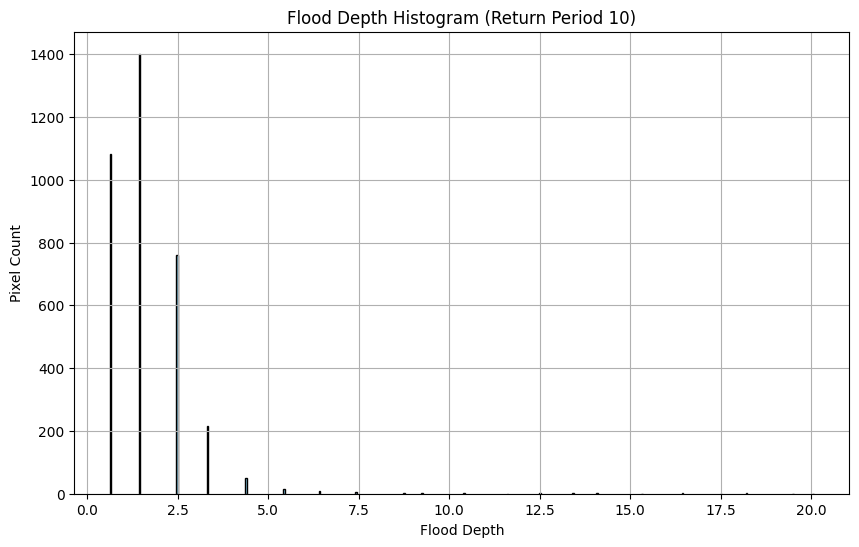

In [12]:
# 📦 Required imports
import ee
import geemap
import matplotlib.pyplot as plt

# 🔐 Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# 📍 Define geometry
coords = [
    [52.3061190642205, 28.827145835706336], 
    [54.3825350798455, 28.827145835706336], 
    [54.3825350798455, 30.227545129963662], 
    [52.3061190642205, 30.227545129963662], 
    [52.3061190642205, 28.827145835706336]
]
geometry = ee.Geometry.Polygon([coords])

# 🌐 Load flood hazard image for return period 10
jrc = ee.ImageCollection("JRC/CEMS_GLOFAS/FloodHazard/v1").filterBounds(geometry)
flood_10 = jrc.filter(ee.Filter.eq('return_period', 10)).mosaic().clip(geometry)

# 📊 Compute histogram using reducer
histogram = flood_10.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=20),
    geometry=geometry,
    scale=1000,
    maxPixels=1e13
)

# 🧮 Extract histogram data
hist_data = histogram.getInfo()
band_name = list(hist_data.keys())[0]  # Usually 'b1' or similar
hist = hist_data[band_name]

# 🎨 Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(hist['bucketMeans'], hist['histogram'], width=0.05, color='skyblue', edgecolor='black')
plt.title('Flood Depth Histogram (Return Period 10)')
plt.xlabel('Flood Depth')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.show()
